In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import math
import psycopg2 as psy
from sqlalchemy import create_engine
from sqlalchemy.engine.url import URL
import pandas.io.sql as psql
%matplotlib inline


In [2]:
connection = psy.connect("dbname=nytd_clean_data user=cguy")

cohort_1 = psql.read_sql("SELECT * FROM cohort_1", connection)

In [3]:
cohort_1 = cohort_1.drop('index',axis=1)
cohort_1.head()

,Wave,StFCID,RepDate_outcomes,OutcmRpt,OutcmDte,OutcmFCS,CurrFTE,CurrPTE,EmplySklls,SocSecrty,...,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Race,RaceEthn,AgeMP
0,Wave 1: Age 17 Baseline Survey,AK450290395006,2011-03-01,Youth participated,2010-10-08,"Yes, is in FC on Date",No,No,No,"Yes, is receiving SSI or SSDI payments",...,0,0,0,0,0,0,1,1,1,17
1,Wave 1: Age 17 Baseline Survey,AK450290395006,2011-03-01,Youth participated,2010-10-08,"Yes, is in FC on Date",No,No,No,"Yes, is receiving SSI or SSDI payments",...,0,0,0,0,0,0,1,1,1,17
2,Wave 2: Age 19 Followup,AK450290395006,2013-03-01,Youth participated,2012-12-28,"No, is not in FC on Date",No,No,No,No,...,0,0,0,0,0,0,1,1,1,17
3,Wave 2: Age 19 Followup,AK450290395006,2013-03-01,Youth participated,2012-12-28,"No, is not in FC on Date",No,No,No,No,...,0,0,0,0,0,0,1,1,1,17
4,Wave 1: Age 17 Baseline Survey,AK450448396586,2011-03-01,Youth participated,2010-12-28,"Yes, is in FC on Date",No,No,Yes,No,...,0,0,0,0,0,0,0,3,3,17


In [4]:
wave_stID = cohort_1[['Wave', 'StFCID']]
wave_stID.head()

,Wave,StFCID
0,Wave 1: Age 17 Baseline Survey,AK450290395006
1,Wave 1: Age 17 Baseline Survey,AK450290395006
2,Wave 2: Age 19 Followup,AK450290395006
3,Wave 2: Age 19 Followup,AK450290395006
4,Wave 1: Age 17 Baseline Survey,AK450448396586


In [5]:
c1w1 = cohort_1.loc[cohort_1['Wave'] == "Wave 1: Age 17 Baseline Survey"]
c1w2 = cohort_1.loc[cohort_1['Wave'] == "Wave 2: Age 19 Followup"]
c1w1.describe()

/Users/cguy/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Weight,FY,StFIPS,Sex,AmIAKN,Asian,BlkAfrAm,HawaiiPI,White,RaceUnkn,...,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Race,RaceEthn,AgeMP
count,12018.000000,22111.0,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.00000,22111.000000,22111.000000,...,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000
mean,2.015134,2011.0,24.522455,1.506897,0.033603,0.015241,0.352132,0.00493,0.530143,1.455294,...,12.439103,12.380173,12.286192,12.194609,12.192936,12.219619,12.273167,11.988422,5.280494,16.560355
std,1.465403,0.0,17.300343,0.499964,0.180210,0.122514,0.477646,0.07004,0.499102,10.436163,...,27.925521,27.950643,27.990404,28.028794,28.029492,28.018345,27.995886,29.961278,15.140712,0.528911
min,0.700000,2011.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,14.000000
25%,NaN,2011.0,6.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,16.000000
50%,NaN,2011.0,22.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,17.000000
75%,NaN,2011.0,36.000000,2.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,6.000000,17.000000
max,18.650000,2011.0,72.000000,2.000000,1.000000,1.000000,1.000000,1.00000,1.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,99.000000,99.000000,20.000000


In [6]:
c1w2.describe()

,Weight,FY,StFIPS,Sex,AmIAKN,Asian,BlkAfrAm,HawaiiPI,White,RaceUnkn,...,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Race,RaceEthn,AgeMP
count,7280.000000,11906.0,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,...,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000
mean,3.530985,2011.0,24.591886,1.510331,0.042332,0.014111,0.338821,0.005627,0.573156,0.467579,...,3.875777,3.810180,3.710398,3.577524,3.592306,3.622291,3.681253,9.035612,3.963716,16.512347
std,3.376826,0.0,16.405165,0.499914,0.201353,0.117952,0.473329,0.074808,0.494640,5.887108,...,16.008149,16.021843,16.042136,16.068158,16.065320,16.059519,16.047942,25.736902,11.456084,0.500204
min,0.880000,2011.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,16.000000
25%,NaN,2011.0,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,16.000000
50%,NaN,2011.0,22.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,17.000000
75%,NaN,2011.0,37.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,17.000000
max,80.710000,2011.0,56.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,99.000000,99.000000,18.000000


In [7]:
c1w1_noDups = c1w1.drop_duplicates('StFCID')

In [8]:
c1w1_noDups.describe()

,Weight,FY,StFIPS,Sex,AmIAKN,Asian,BlkAfrAm,HawaiiPI,White,RaceUnkn,...,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Race,RaceEthn,AgeMP
count,7405.000000,13743.0,13743.000000,13743.000000,13743.000000,13743.000000,13743.000000,13743.000000,13743.000000,13743.000000,...,13743.000000,13743.000000,13743.000000,13743.000000,13743.000000,13743.000000,13743.000000,13743.000000,13743.000000,13743.000000
mean,1.995284,2011.0,23.951830,1.504475,0.034490,0.015135,0.353489,0.005166,0.526232,1.379102,...,10.836499,10.774358,10.683985,10.593102,10.586408,10.616168,10.675689,12.199738,5.140872,16.711999
std,1.396944,0.0,17.121035,0.499998,0.182491,0.122094,0.478070,0.071693,0.499330,10.167792,...,26.335660,26.359967,26.395016,26.429904,26.432460,26.421084,26.398215,30.220365,14.729140,0.478629
min,0.700000,2011.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,14.000000
25%,NaN,2011.0,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,16.000000
50%,NaN,2011.0,22.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,17.000000
75%,NaN,2011.0,36.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,6.000000,17.000000
max,18.650000,2011.0,72.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,99.000000,99.000000,20.000000


In [9]:
c1w1_noDups.head()

,Wave,StFCID,RepDate_outcomes,OutcmRpt,OutcmDte,OutcmFCS,CurrFTE,CurrPTE,EmplySklls,SocSecrty,...,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Race,RaceEthn,AgeMP
0,Wave 1: Age 17 Baseline Survey,AK450290395006,2011-03-01,Youth participated,2010-10-08,"Yes, is in FC on Date",No,No,No,"Yes, is receiving SSI or SSDI payments",...,0,0,0,0,0,0,1,1,1,17
4,Wave 1: Age 17 Baseline Survey,AK450448396586,2011-03-01,Youth participated,2010-12-28,"Yes, is in FC on Date",No,No,Yes,No,...,0,0,0,0,0,0,0,3,3,17
8,Wave 1: Age 17 Baseline Survey,AK450461296715,2011-03-01,Not in sample,NaT,"Yes, is in FC on Date","Yes, employed full time","Yes, employed part time",Yes,"Yes, is receiving SSI or SSDI payments",...,0,0,0,0,0,0,1,1,1,17
10,Wave 1: Age 17 Baseline Survey,AK450540097503,2011-03-01,Youth participated,2010-10-13,"Yes, is in FC on Date",No,"Yes, employed part time",No,"Yes, is receiving SSI or SSDI payments",...,0,0,0,0,0,1,1,1,1,17
14,Wave 1: Age 17 Baseline Survey,AK450652098623,2011-03-01,Youth participated,2011-03-17,"Yes, is in FC on Date",No,No,Yes,No,...,0,0,0,0,0,0,0,1,1,17


In [10]:
c1w2_noDups = c1w2.drop_duplicates('StFCID')

In [11]:
c1w2_noDups.describe()

,Weight,FY,StFIPS,Sex,AmIAKN,Asian,BlkAfrAm,HawaiiPI,White,RaceUnkn,...,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Race,RaceEthn,AgeMP
count,4499.000000,7354.0,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,...,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000
mean,3.421336,2011.0,24.421539,1.507887,0.042834,0.014142,0.338047,0.006119,0.571798,0.443840,...,3.318874,3.252516,3.154474,3.023797,3.033315,3.070574,3.132853,9.111504,3.883601,16.673647
std,3.121785,0.0,16.349738,0.499972,0.202496,0.118084,0.473077,0.077990,0.494852,5.733879,...,14.748996,14.761526,14.779473,14.802351,14.800725,14.794298,14.783340,25.858339,11.113024,0.468910
min,0.880000,2011.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,16.000000
25%,NaN,2011.0,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,16.000000
50%,NaN,2011.0,22.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,17.000000
75%,NaN,2011.0,37.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,17.000000
max,80.710000,2011.0,56.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,99.000000,99.000000,17.000000


In [12]:
c1w2_noDups.head()

,Wave,StFCID,RepDate_outcomes,OutcmRpt,OutcmDte,OutcmFCS,CurrFTE,CurrPTE,EmplySklls,SocSecrty,...,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Race,RaceEthn,AgeMP
2,Wave 2: Age 19 Followup,AK450290395006,2013-03-01,Youth participated,2012-12-28,"No, is not in FC on Date",No,No,No,No,...,0,0,0,0,0,0,1,1,1,17
6,Wave 2: Age 19 Followup,AK450448396586,2013-03-01,Youth participated,2012-12-03,"No, is not in FC on Date",No,No,No,No,...,0,0,0,0,0,0,0,3,3,17
12,Wave 2: Age 19 Followup,AK450540097503,2013-03-01,Youth participated,2013-01-17,"No, is not in FC on Date",No,No,No,No,...,0,0,0,0,0,1,1,1,1,17
15,Wave 2: Age 19 Followup,AK450652098623,2013-03-01,Youth participated,2012-11-19,"No, is not in FC on Date",No,"Yes, employed part time",No,No,...,0,0,0,0,0,0,0,1,1,17
18,Wave 2: Age 19 Followup,AK451448406587,2013-09-01,Youth participated,2013-05-17,"No, is not in FC on Date","Yes, employed full time",No,No,No,...,0,0,0,0,0,0,1,3,3,17


In [13]:
# Create list of Wave2 ID's
# Create dataframe of W1 participants who are W2 participants using list

wave_2 = c1w2_noDups[['StFCID']]
list(wave_2)

['StFCID']

In [14]:
c1w1_onlyw2 = c1w1_noDups.loc[c1w1_noDups['StFCID'].isin(wave_2.StFCID.values)]


In [15]:
c1w1_onlyw2.head()

,Wave,StFCID,RepDate_outcomes,OutcmRpt,OutcmDte,OutcmFCS,CurrFTE,CurrPTE,EmplySklls,SocSecrty,...,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Race,RaceEthn,AgeMP
0,Wave 1: Age 17 Baseline Survey,AK450290395006,2011-03-01,Youth participated,2010-10-08,"Yes, is in FC on Date",No,No,No,"Yes, is receiving SSI or SSDI payments",...,0,0,0,0,0,0,1,1,1,17
4,Wave 1: Age 17 Baseline Survey,AK450448396586,2011-03-01,Youth participated,2010-12-28,"Yes, is in FC on Date",No,No,Yes,No,...,0,0,0,0,0,0,0,3,3,17
10,Wave 1: Age 17 Baseline Survey,AK450540097503,2011-03-01,Youth participated,2010-10-13,"Yes, is in FC on Date",No,"Yes, employed part time",No,"Yes, is receiving SSI or SSDI payments",...,0,0,0,0,0,1,1,1,1,17
14,Wave 1: Age 17 Baseline Survey,AK450652098623,2011-03-01,Youth participated,2011-03-17,"Yes, is in FC on Date",No,No,Yes,No,...,0,0,0,0,0,0,0,1,1,17
17,Wave 1: Age 17 Baseline Survey,AK451448406587,2011-09-01,Youth participated,2011-05-25,"Yes, is in FC on Date",No,No,No,No,...,0,0,0,0,0,0,1,3,3,17


In [16]:
c1w1_onlyw2.describe()

,Weight,FY,StFIPS,Sex,AmIAKN,Asian,BlkAfrAm,HawaiiPI,White,RaceUnkn,...,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Race,RaceEthn,AgeMP
count,7328.000000,7328.0,7328.000000,7328.000000,7328.000000,7328.000000,7328.00000,7328.000000,7328.000000,7328.000000,...,7328.000000,7328.000000,7328.000000,7328.000000,7328.000000,7328.000000,7328.000000,7328.000000,7328.000000,7328.000000
mean,1.998709,2011.0,24.459607,1.508597,0.042576,0.014192,0.33911,0.006141,0.570688,0.445278,...,3.329967,3.261736,3.164984,3.034116,3.043805,3.081332,3.143832,9.125000,3.886736,16.673717
std,1.403456,0.0,16.345358,0.499960,0.201914,0.118290,0.47344,0.078128,0.495012,5.743981,...,14.773944,14.786853,14.804598,14.827563,14.825904,14.819415,14.808391,25.878989,11.131422,0.468884
min,0.700000,2011.0,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,16.000000
25%,1.180000,2011.0,8.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,16.000000
50%,1.480000,2011.0,22.000000,2.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,17.000000
75%,2.340000,2011.0,37.000000,2.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,17.000000
max,18.650000,2011.0,56.000000,2.000000,1.000000,1.000000,1.00000,1.000000,1.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,99.000000,99.000000,17.000000


In [17]:
frames = [c1w1_onlyw2, c1w2_noDups]

cohort_1_w1w2 = pd.concat(frames)

In [18]:
cohort_1_w1w2.Wave.value_counts()

Wave 2: Age 19 Followup           7354
Wave 1: Age 17 Baseline Survey    7328
Name: Wave, dtype: int64

In [19]:
wave_1 = c1w1_noDups[['StFCID']]
list(wave_1)
cohort_1_w1w2 = cohort_1_w1w2.loc[cohort_1_w1w2['StFCID'].isin(wave_1.StFCID.values)]


In [20]:
cohort_1_w1w2.Wave.value_counts()

Wave 1: Age 17 Baseline Survey    7328
Wave 2: Age 19 Followup           7328
Name: Wave, dtype: int64

In [21]:
# Dropping non-important features:

cohort_1_w1w2 = cohort_1_w1w2.drop(['SocSecrty','EmplySklls', 'EducAid','Children','Marriage','CnctAdult'], axis=1)

In [22]:
cohort_1_w1w2.columns

Index([u'Wave', u'StFCID', u'RepDate_outcomes', u'OutcmRpt', u'OutcmDte',
       u'OutcmFCS', u'CurrFTE', u'CurrPTE', u'PubFinAs', u'PubFoodAs',
       u'PubHousAs', u'OthrFinAs', u'HighEdCert', u'CurrenRoll', u'Homeless',
       u'SubAbuse', u'Incarc', u'Medicaid', u'OthrHlthIn', u'MedicalIn',
       u'MentlHlthIn', u'PrescripIn', u'SampleState', u'InSample', u'Baseline',
       u'FY11Cohort', u'Elig19', u'Weight', u'Responded', u'FY',
       u'RepDate_services', u'StFIPS', u'St', u'DOB', u'Sex', u'AmIAKN',
       u'Asian', u'BlkAfrAm', u'HawaiiPI', u'White', u'RaceUnkn', u'RaceDcln',
       u'HisOrgin', u'FCStatSv', u'TribeSv', u'DelinqntSv', u'EdLevlSv',
       u'SpecEdSv', u'ILNAsv', u'AcSuppSv', u'PSEdSuppSv', u'CareerSv',
       u'EmplyTrSv', u'BudgetSv', u'HousEdSv', u'HlthEdSv', u'FamSuppSv',
       u'MentorSv', u'SILsv', u'RmBrdFASv', u'EducFinaSv', u'OthrFinaSv',
       u'Race', u'RaceEthn', u'AgeMP'],
      dtype='object')

In [140]:
# Seperate dataframe into feature vars and target vars

targets = cohort_1_w1w2[['PubFoodAs','PubHousAs','OthrFinAs','HighEdCert','CurrFTE','CurrPTE', \
                     'PubFinAs','CurrenRoll','PrescripIn','Homeless','SubAbuse','Incarc','Medicaid','OthrHlthIn','MedicalIn','MentlHlthIn', 'Wave']]


features = cohort_1_w1w2[['ILNAsv','AcSuppSv','PSEdSuppSv','CareerSv','EmplyTrSv','BudgetSv','HousEdSv','HlthEdSv',\
                     'FamSuppSv','MentorSv','SILsv','RmBrdFASv','EducFinaSv','OthrFinaSv','St','DelinqntSv','Wave']]


In [141]:
for column in features:
    print (column + str(features[column].unique()))

ILNAsv[ 0  1 77]
AcSuppSv[ 0  1 77]
PSEdSuppSv[ 0  1 77]
CareerSv[ 0  1 77]
EmplyTrSv[ 0  1 77]
BudgetSv[ 0  1 77]
HousEdSv[ 1  0 77]
HlthEdSv[ 0  1 77]
FamSuppSv[ 0  1 77]
MentorSv[ 0  1 77]
SILsv[ 0  1 77]
RmBrdFASv[ 0  1 77]
EducFinaSv[ 0  1 77]
OthrFinaSv[ 1  0 77]
St['AK' 'AL' 'AR' 'AZ' 'CA' 'RI' 'CO' 'DC' 'DE' 'FL' 'GA' 'IA' 'ID' 'IL' 'KS'
 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MT' 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV'
 'NY' 'OH' 'OK' 'SC' 'SD' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']
DelinqntSv[ 0  1 77]
Wave['Wave 1: Age 17 Baseline Survey' 'Wave 2: Age 19 Followup']


In [142]:
for column in targets:
    print (column + str(targets[column].unique()))

PubFoodAs['No' 'Yes' 'Declined' 'Not Applicable (in Foster Care)' 'Blank']
PubHousAs['No' 'Yes' 'Declined' 'Blank' 'Not Applicable (in Foster Care)']
OthrFinAs['No' 'Declined' 'Yes' 'Blank']
HighEdCert['None of the above' 'High school diploma/GED' 'Declined'
 'Vocational certificate' 'Higher degree' "Bachelor's Degree"
 'Vocational license' 'Blank' "Associate's Degree" None]
CurrFTE['No' 'Yes, employed full time' 'Declined' 'Blank']
CurrPTE['No' 'Yes, employed part time' 'Declined' 'Blank']
PubFinAs['No' 'Yes' 'Declined' 'Not Applicable (in Foster Care)' 'Blank']
CurrenRoll['Yes' 'No' 'Declined' 'Blank']
PrescripIn['Yes' 'No' 'Not Applicable' "Don't Know" 'Declined' 'Blank']
Homeless['No' 'Yes' 'Blank' 'Declined']
SubAbuse['Yes' 'No' 'Declined' 'Blank']
Incarc['No' 'Yes' 'Blank' 'Declined']
Medicaid['Yes' 'No' 'Do Not Know' 'Declined' 'Blank']
OthrHlthIn['No' 'Do Not Know' 'Yes' 'Declined' 'Blank' '88.0' '78.0']
MedicalIn["Don't Know" 'No' 'Yes' 'Not Applicable' 'Declined' 'Blank']
Men

In [143]:
# # Create column for number of services received

services_count = features.T
services_count = services_count.drop('Wave')
services_count = services_count.drop('St')
services_count = services_count.drop('DelinqntSv')


features['Num_services'] = (services_count == 1).sum()
features.head(10)

/Users/cguy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,St,DelinqntSv,Wave,Num_services
0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,AK,0,Wave 1: Age 17 Baseline Survey,2
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,AK,0,Wave 1: Age 17 Baseline Survey,1
10,1,0,0,0,0,0,0,0,0,0,0,0,1,1,AK,0,Wave 1: Age 17 Baseline Survey,3
14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,AK,0,Wave 1: Age 17 Baseline Survey,1
17,1,0,0,0,0,0,0,0,0,0,0,0,0,1,AK,0,Wave 1: Age 17 Baseline Survey,2
19,0,0,0,0,0,0,0,0,0,0,0,0,0,1,AK,0,Wave 1: Age 17 Baseline Survey,1
21,1,0,0,0,0,0,1,1,0,0,0,0,0,1,AK,0,Wave 1: Age 17 Baseline Survey,4
25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,AK,0,Wave 1: Age 17 Baseline Survey,2
29,0,0,0,0,0,0,0,0,0,0,0,0,0,1,AK,0,Wave 1: Age 17 Baseline Survey,1
31,1,0,0,0,0,0,0,0,0,0,0,0,0,1,AK,0,Wave 1: Age 17 Baseline Survey,2


In [144]:
# Let's focus on just W2 targets and features

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

features_2 = features[['St']]

for column in features_2:
    features_2[column] = le.fit_transform(features_2[column])


/Users/cguy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [147]:
features = features.drop('St', axis = 1)


In [158]:
features = features_2.join(features, on=None, how='left')

features_w2 = features[features.Wave == "Wave 2: Age 19 Followup"]


features_w2.head()

ValueError: columns overlap but no suffix specified: Index([u'St'], dtype='object')

In [159]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

targets_w2 = targets_w2_.copy()

for column in targets_w2:
    targets_w2[column] = le.fit_transform(targets_w2[column])


In [150]:
y_corr = np.corrcoef(targets_w2.values.T)
targets_w2.corr()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,PubFinAs,CurrenRoll,PrescripIn,Homeless,SubAbuse,Incarc,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn
PubFoodAs,1.000000,0.886919,0.870077,0.714728,0.869874,0.856714,0.888024,0.858523,0.892729,0.872588,0.873892,0.858727,0.887538,0.868990,0.891632,0.889446
PubHousAs,0.886919,1.000000,0.895309,0.712087,0.890962,0.882024,0.929199,0.894590,0.914980,0.872408,0.893191,0.872126,0.904352,0.885868,0.913547,0.913284
OthrFinAs,0.870077,0.895309,1.000000,0.738008,0.924232,0.915193,0.884853,0.914356,0.941550,0.916054,0.928380,0.915808,0.929921,0.922400,0.940742,0.938488
HighEdCert,0.714728,0.712087,0.738008,1.000000,0.723115,0.715918,0.709558,0.757422,0.751611,0.748057,0.743454,0.740237,0.748196,0.732575,0.748967,0.749937
CurrFTE,0.869874,0.890962,0.924232,0.723115,1.000000,0.911457,0.883162,0.907216,0.952491,0.921979,0.932155,0.920066,0.925983,0.929696,0.953366,0.950071
CurrPTE,0.856714,0.882024,0.915193,0.715918,0.911457,1.000000,0.872666,0.902568,0.933062,0.904285,0.914444,0.899056,0.917177,0.909664,0.932853,0.928115
PubFinAs,0.888024,0.929199,0.884853,0.709558,0.883162,0.872666,1.000000,0.884991,0.905017,0.868806,0.883262,0.862984,0.899117,0.880122,0.902910,0.901851
CurrenRoll,0.858523,0.894590,0.914356,0.757422,0.907216,0.902568,0.884991,1.000000,0.934347,0.892984,0.909427,0.894658,0.927136,0.913728,0.933575,0.930470
PrescripIn,0.892729,0.914980,0.941550,0.751611,0.952491,0.933062,0.905017,0.934347,1.000000,0.935910,0.947686,0.936397,0.945660,0.956237,0.985035,0.983358
Homeless,0.872588,0.872408,0.916054,0.748057,0.921979,0.904285,0.868806,0.892984,0.935910,1.000000,0.932703,0.927434,0.915469,0.918826,0.936868,0.932474


In [151]:
eig_vals, eig_vecs = np.linalg.eig(y_corr)
print eig_vals
print eig_vecs


[  1.44077983e+01   4.00291671e-01   2.49372515e-01   1.45369332e-01
   1.36106660e-02   1.97807403e-02   1.11188252e-01   1.01881933e-01
   8.98588242e-02   5.12413705e-02   5.29265812e-02   6.29249842e-02
   7.76505095e-02   7.66646631e-02   6.77224314e-02   7.17172285e-02]
[[-0.24274627 -0.02715446  0.48993157 -0.65771877  0.00240736 -0.01172185
   0.46487323 -0.03573324  0.10888298 -0.0696121  -0.02047043  0.04894277
   0.08252407 -0.14119096  0.06212393 -0.00790653]
 [-0.24772108 -0.0904995   0.46997139  0.22998895 -0.00706364 -0.00368329
  -0.32556906  0.00594446 -0.06487427 -0.12363542  0.08107211 -0.20789057
   0.08573253 -0.35392307 -0.59028161  0.01589096]
 [-0.25326292 -0.05094828 -0.09079979  0.08714081  0.00440117  0.00648906
  -0.00317517 -0.20997205  0.26286916 -0.02442725  0.00803815  0.29862809
  -0.76787696 -0.34366885  0.04008936 -0.07052322]
 [-0.20786823  0.96888389  0.02170922  0.0271264   0.00234494  0.00331329
  -0.01963713 -0.00298085 -0.1137424  -0.01743689 -0

In [152]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print cum_var_exp

[  90.04873937   92.55056231   94.10914053   95.01769885   95.71262542
   96.34938751   96.91100516   97.39632084   97.87547499   98.32370766
   98.74697286   99.14025401   99.47104514   99.79130371   99.91493334
  100.        ]


In [153]:
value_vector_pairs = [[eig_vals[i], eig_vecs[:,i]] for i in range(len(eig_vals))]
value_vector_pairs.sort(reverse=True)

In [154]:
weight_2d_projection = np.hstack((value_vector_pairs[0][1].reshape(eig_vecs.shape[1],1),
                                  value_vector_pairs[1][1].reshape(eig_vecs.shape[1],1)))

print 'Weight data 2d PCA projection matrix:\n', weight_2d_projection

Weight data 2d PCA projection matrix:
[[-0.24274627 -0.02715446]
 [-0.24772108 -0.0904995 ]
 [-0.25326292 -0.05094828]
 [-0.20786823  0.96888389]
 [-0.25368894 -0.10275778]
 [-0.25015934 -0.09435716]
 [-0.24587591 -0.08183761]
 [-0.25109508  0.03088238]
 [-0.25922666 -0.06640597]
 [-0.25185455 -0.00354776]
 [-0.25458118 -0.04397959]
 [-0.25145182 -0.02278282]
 [-0.25487988 -0.03453333]
 [-0.25380483 -0.07288633]
 [-0.2590987  -0.07223928]
 [-0.2583296  -0.0634675 ]]


In [155]:
Z = targets_w2.dot(weight_2d_projection)


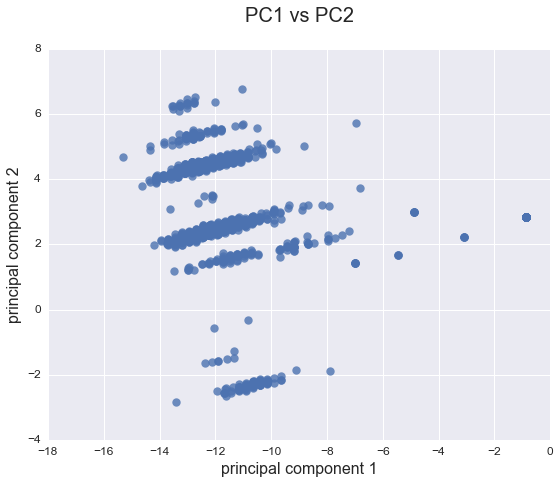

In [156]:
fig = plt.figure(figsize=(9,7))

ax = fig.gca()
ax = sns.regplot(Z.iloc[:,0], Z.iloc[:,1],
                 fit_reg=False, scatter_kws={'s':70}, ax=ax)

ax.set_xlabel('principal component 1', fontsize=16)
ax.set_ylabel('principal component 2', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC1 vs PC2\n', fontsize=20)

plt.show()

In [157]:
targets_w2

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,PubFinAs,CurrenRoll,PrescripIn,Homeless,SubAbuse,Incarc,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn
2,4,2,2,7,2,2,2,2,4,3,2,2,4,4,4,4
6,2,2,2,5,2,2,2,2,4,2,2,2,3,4,4,4
12,4,2,2,5,2,2,2,3,4,2,3,3,4,4,4,4
15,4,2,2,5,2,3,2,2,4,3,2,2,4,4,4,4
18,4,2,2,5,3,2,2,2,4,3,2,2,4,5,2,4
20,3,3,2,7,2,2,3,3,4,2,2,2,4,4,4,4
23,3,3,2,7,2,2,3,3,5,2,2,2,4,5,5,5
27,2,2,2,5,2,2,2,2,5,2,2,2,4,5,5,3
30,4,2,2,7,3,2,2,2,4,3,2,3,4,4,4,4
33,2,1,3,7,2,2,1,3,4,3,2,3,4,4,4,4


In [37]:
targets_2 = targets_w2

targets_pcs = targets_2.copy

targets_pcs = (targets_2 - targets_2.mean()) / targets_2.std()

targets_pcs['PC1'] = Z.iloc[:,0]
targets_pcs['PC2'] = Z.iloc[:,1]

In [38]:
targets_pcs = pd.melt(targets_pcs, id_vars=['PC1','PC2'])


In [39]:
targets_pcs.head()

,PC1,PC2,variable,value
0,-12.338658,4.512236,PubFoodAs,1.551348
1,-10.930694,2.666858,PubFoodAs,0.199028
2,-12.428195,2.542136,PubFoodAs,1.551348
3,-12.173080,2.480111,PubFoodAs,1.551348
4,-11.912217,2.543302,PubFoodAs,1.551348


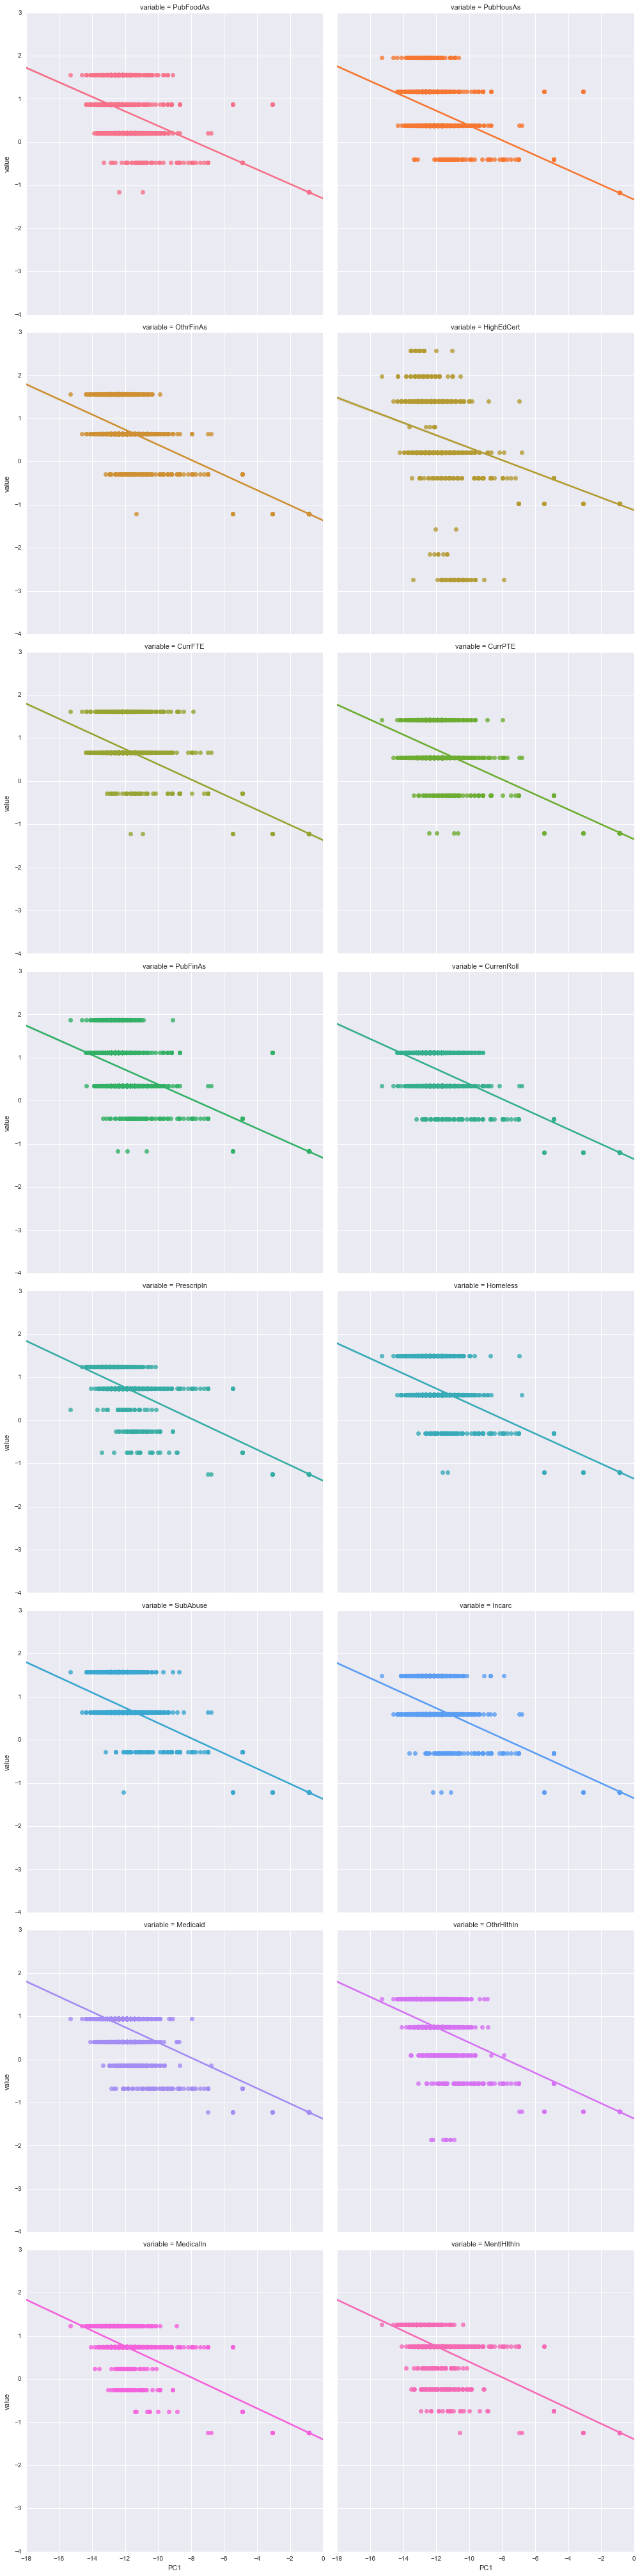

In [40]:
pc1 = sns.lmplot(x="PC1", y="value", col="variable", hue="variable", 
                 data=targets_pcs, col_wrap=2, size=7, scatter_kws={'s':50})

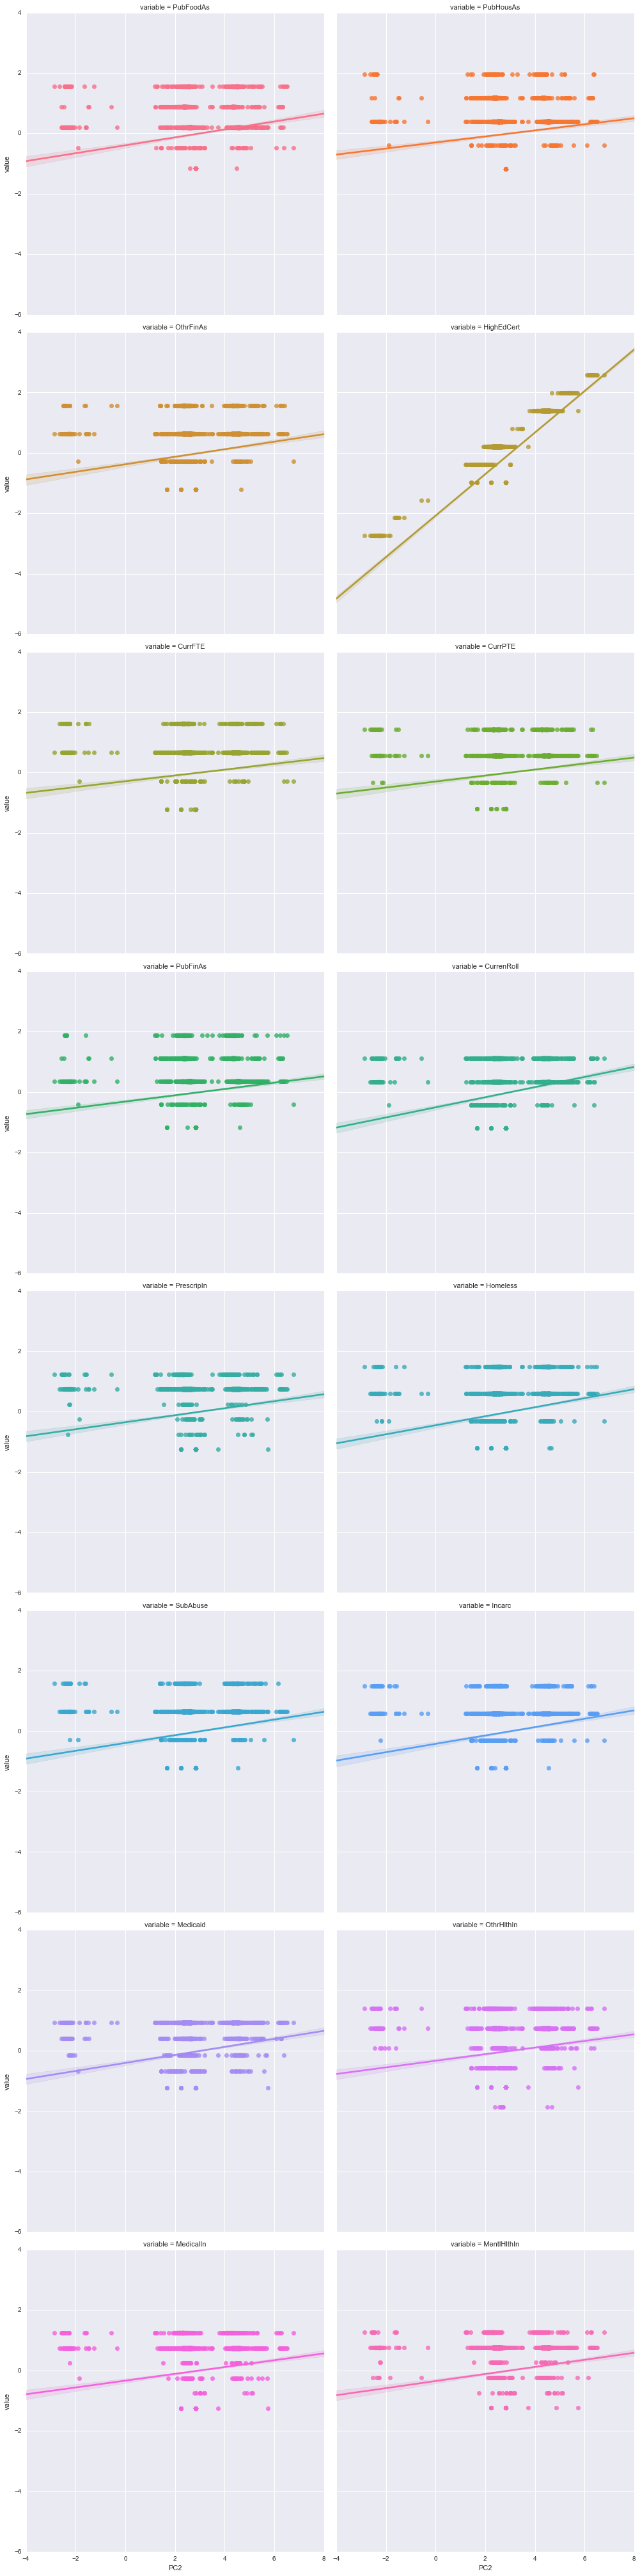

In [42]:
pc2 = sns.lmplot(x="PC2", y="value", col="variable", hue="variable", 
                 data=targets_pcs, col_wrap=2, size=7, scatter_kws={'s':50})


In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=6)
# pca.fit(features_w2)
# print(pca.explained_variance_)
# print(pca.components_)

In [53]:
targets_w2.columns

Index([u'PubFoodAs', u'PubHousAs', u'OthrFinAs', u'HighEdCert', u'CurrFTE',
       u'CurrPTE', u'PubFinAs', u'CurrenRoll', u'PrescripIn', u'Homeless',
       u'SubAbuse', u'Incarc', u'Medicaid', u'OthrHlthIn', u'MedicalIn',
       u'MentlHlthIn'],
      dtype='object')

In [54]:
targets_w2.columns.get_loc("PubFoodAs")


0

In [55]:
targets_w2.columns.get_loc("MentlHlthIn")


15

In [56]:
targets_w2.columns.get_loc("HighEdCert")


3

In [50]:
features_w2.columns.get_loc("ILNAsv")


0

In [51]:
features_w2.columns.get_loc("Num_services")


14

In [70]:
# Establish x and y variables. Average_airport_departure_delay will be target variable for this analysis...
x = features_w2.ix[:,:].values
y = targets_w2.ix[:,:].values

In [71]:
# Standardize data

from sklearn.preprocessing import StandardScaler

xStand = StandardScaler().fit_transform(x)

/Users/cguy/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/cguy/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [72]:
# Calculate eigenvectors and eigenvalues from covariance matrix.

covMat = np.cov(xStand.T)
eigenValues, eigenVectors = np.linalg.eig(covMat)

In [73]:
print(eigenValues)
print(eigenVectors)

[  1.40538387e+01   9.40296724e-01   1.17755505e-03   9.33602536e-04
   8.51891406e-04   2.22651011e-04   2.62771754e-04   3.51416345e-04
   4.69775628e-04   7.23679273e-04   5.10468492e-04   5.48156712e-04
   5.87410178e-04   6.18165844e-04   6.54253058e-04]
[[  2.66608558e-01  -1.32183806e-02   8.68409437e-01   1.49844968e-02
    3.80290663e-01  -6.26140207e-02  -7.50427260e-02   7.90279560e-02
    7.34126141e-02   3.50263715e-02  -2.04573006e-02   5.22486838e-02
   -6.26861432e-02  -1.65054660e-02   8.15424703e-04]
 [  2.66600766e-01  -2.10010442e-02  -4.30772754e-01  -2.84286317e-01
    7.53294745e-01  -1.90230272e-02  -7.60116696e-02   4.74974771e-02
    8.67146405e-02   1.07692486e-01  -1.33400538e-01   3.78092092e-02
    2.83930524e-02   1.87978413e-01  -1.08471610e-01]
 [  2.66665649e-01  -1.77483218e-02  -3.08534806e-03  -1.13271207e-01
   -6.48190835e-02   3.53249350e-02  -2.53448267e-03   2.57521427e-01
   -8.35499819e-01  -2.66260544e-01  -3.60007562e-02   5.08121131e-02
  

In [74]:
# Sorting eigenpairs from highest to lowest

eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
eigenPairs.sort()
eigenPairs.reverse()
for i in eigenPairs:
    print(i[0])

14.0538387011
0.940296724187
0.00117755504836
0.000933602536145
0.000851891406053
0.000723679273308
0.00065425305793
0.000618165843987
0.00058741017783
0.000548156711817
0.000510468491769
0.000469775628187
0.000351416344756
0.000262771754452
0.000222651011096


In [75]:
totalEigen = sum(eigenValues)
varExpl = [(i / totalEigen)*100 for i in sorted(eigenValues, reverse=True)]

In [76]:
print(varExpl)


[93.679472491968596, 6.2677893905711599, 0.007849295705376718, 0.0062231675603475201, 0.0056785010299782021, 0.00482387011966013, 0.0043610918444833714, 0.0041205432486301529, 0.0039155334542965506, 0.0036538793918129021, 0.003402658878446803, 0.0031314101416744108, 0.0023424559297948459, 0.0017515726390723648, 0.001484137516651706]


In [77]:
cvarex = np.cumsum(varExpl)


In [78]:
print(cvarex)

[ 93.67947249  99.94726188  99.95511118  99.96133435  99.96701285
  99.97183672  99.97619781  99.98031835  99.98423389  99.98788776
  99.99129042  99.99442183  99.99676429  99.99851586 100.        ]


In [79]:
from sklearn.decomposition import PCA 


pcask = PCA(n_components=2)
print pcask.fit(xStand).components_ # See the eigenvectors
xPC = pcask.fit_transform(xStand) # Use the eigenvectors to transform xStand onto new axes

[[ 0.26660856  0.26660077  0.26666565  0.26660439  0.26664217  0.26661199
   0.26661028  0.26660639  0.2666236   0.26666019  0.26672708  0.26671778
   0.26669905  0.26667074 -0.0677957 ]
 [-0.01321838 -0.02100104 -0.01774832 -0.02504467 -0.01938467 -0.02433698
  -0.02474236 -0.02574014 -0.02241804 -0.01569379 -0.0075688  -0.01166433
  -0.01196572 -0.01309313 -0.99746799]]


In [80]:
PCdf = pd.DataFrame(xPC, columns=['PC1','PC2'])


In [81]:
targets_2 = targets_w2


In [83]:
target_pca = targets_2.join(PCdf, on=None, how='left')


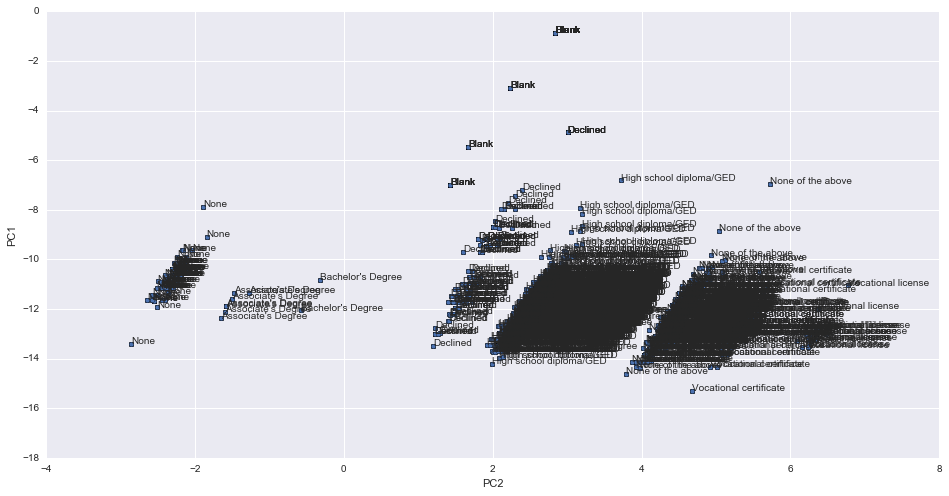

In [90]:
graph = targets_pcs.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, target in enumerate(targets_w2_['HighEdCert']):
    graph.annotate(target, (targets_pcs.iloc[i].PC2, targets_pcs.iloc[i].PC1))

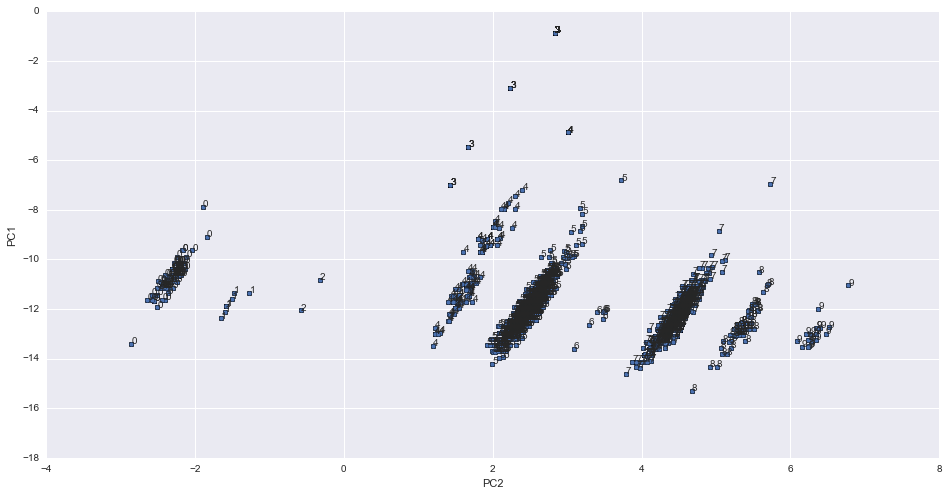

In [91]:
graph = targets_pcs.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, target in enumerate(targets_w2['HighEdCert']):
    graph.annotate(target, (targets_pcs.iloc[i].PC2, targets_pcs.iloc[i].PC1))

# K-Means Cluster Analysis


In [103]:
from sklearn.cluster import KMeans
from sklearn import metrics


kmeans = KMeans(n_clusters=9)
clusters = kmeans.fit(targets_w2)

In [104]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [105]:
print(centroids)

[[  7.46799431e-03   7.46799431e-03   3.20056899e-03   3.00391181e+00
    3.20056899e-03   3.20056899e-03   7.46799431e-03   3.20056899e-03
    1.77809388e-03   3.55618777e-03   3.20056899e-03   3.20056899e-03
    2.48933144e-03   1.00177809e+00   1.77809388e-03   1.77809388e-03]
 [  4.00000000e+00   1.99293286e+00   2.09540636e+00   4.97173145e+00
    2.13074205e+00   2.25088339e+00   1.98939929e+00   2.30035336e+00
    3.98233216e+00   2.27915194e+00   2.13780919e+00   2.21554770e+00
    3.66431095e+00   3.96819788e+00   4.02826855e+00   3.90106007e+00]
 [  1.97304965e+00   1.97872340e+00   2.11631206e+00   7.03829787e+00
    2.07234043e+00   2.16595745e+00   1.98014184e+00   2.57588652e+00
    4.05390071e+00   2.21843972e+00   2.14468085e+00   2.30780142e+00
    3.55744681e+00   4.00851064e+00   4.07801418e+00   4.01276596e+00]
 [  2.48739496e+00   2.18487395e+00   2.12605042e+00   9.24369748e-02
    2.25210084e+00   2.21848739e+00   2.16806723e+00   2.38655462e+00
    4.07563025e+0

In [106]:
metrics.silhouette_score(targets_w2, labels, metric='euclidean')

0.53597774716604096

In [107]:
target_pca['cluster'] = pd.Series(clusters.labels_)


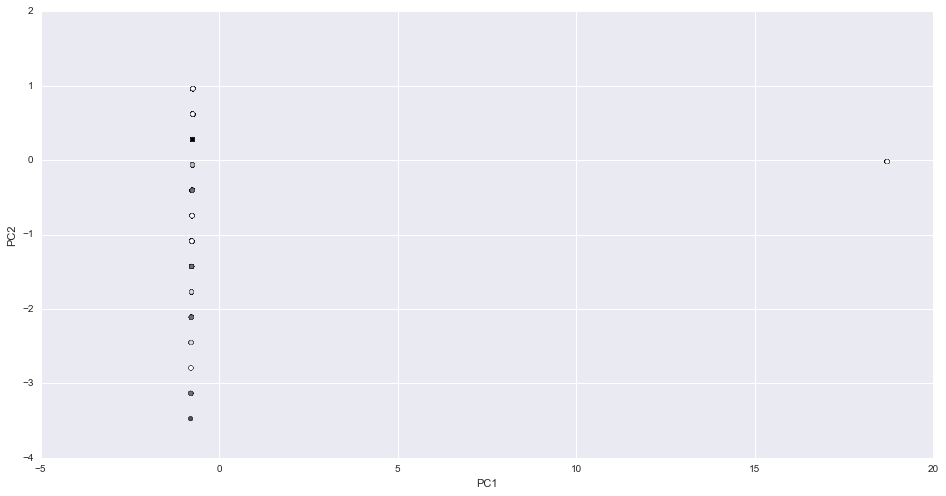

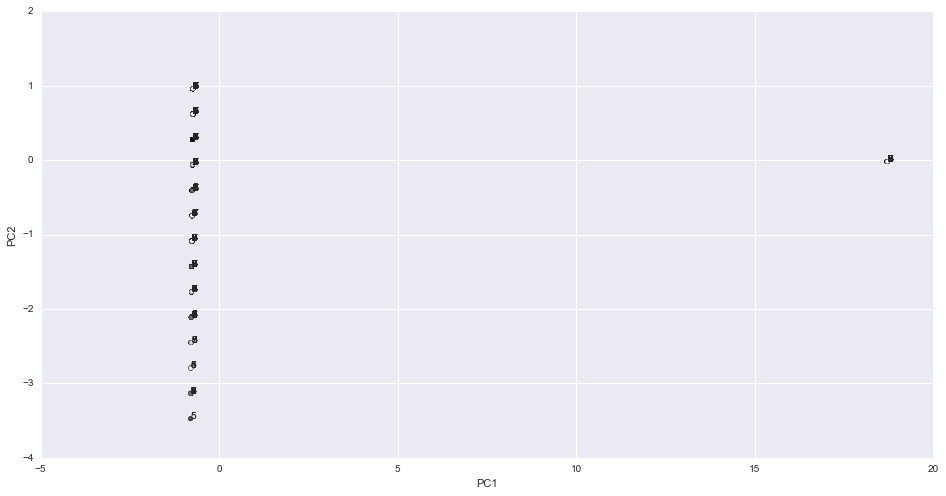

In [108]:

graph = target_pca.plot(
    kind='scatter',
    x='PC1',y='PC2',
    c=target_pca.cluster.astype(np.float), 
    figsize=(16,8))

graph2 = target_pca.plot(
    kind='scatter',
    x='PC1',y='PC2',
    c=target_pca.cluster.astype(np.float), 
    figsize=(16,8))

for i, target in enumerate(targets_w2['HighEdCert']):
    graph2.annotate(target, (target_pca.iloc[i].PC1, target_pca.iloc[i].PC2))

In [ ]:
value_vector_pairs = [[eig_vals[i], eig_vecs[:,i]] for i in range(len(eig_vals))]
value_vector_pairs.sort(reverse=True)

weight_2d_projection = np.hstack((value_vector_pairs[0][1].reshape(eig_vecs.shape[1],1),
                                  value_vector_pairs[1][1].reshape(eig_vecs.shape[1],1)))

print 'Weight data 2d PCA projection matrix:\n', weight_2d_projection

Z = targets_w2.dot(weight_2d_projection)

fig = plt.figure(figsize=(9,7))

ax = fig.gca()
ax = sns.regplot(Z.iloc[:,0], Z.iloc[:,1],
                 fit_reg=False, scatter_kws={'s':70}, ax=ax)

ax.set_xlabel('principal component 1', fontsize=16)
ax.set_ylabel('principal component 2', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC1 vs PC2\n', fontsize=20)

plt.show()

targets_2 = targets_w2

targets_pcs = targets_2.copy

targets_pcs = (targets_2 - targets_2.mean()) / targets_2.std()

targets_pcs['PC1'] = Z.iloc[:,0]
targets_pcs['PC2'] = Z.iloc[:,1]

targets_pcs = pd.melt(targets_pcs, id_vars=['PC1','PC2'])


In [ ]:
from sklearn.cross_validation import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features_w2, targets_w2, train_size=0.5)

In [ ]:
clf2 = MultiOutputRF().fit(Xtrain, Ytrain)
Ypred = clf2.predict(Xtest)

In [ ]:
accuracy_score(Ytest, Ypred)


In [112]:
import numpy as np
import pandas as pd

from scipy.cluster import hierarchy

import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
X = features_w2

In [114]:
from scipy.spatial import distance as ssd


Z = hierarchy.linkage(ssd.squareform(X), method="complete")


ValueError: The matrix argument must be square.

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
dn = hierarchy.dendrogram(Z)

In [119]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
import numpy as np
import pandas as pd
import os
from scipy.cluster.hierarchy import fcluster

%matplotlib inline

In [115]:
X = features_w2.as_matrix(columns=None)


In [117]:
Z = hierarchy.linkage(X, 'ward')


In [120]:
c, coph_dists = cophenet(Z, pdist(X))
c

0.99863710992254018

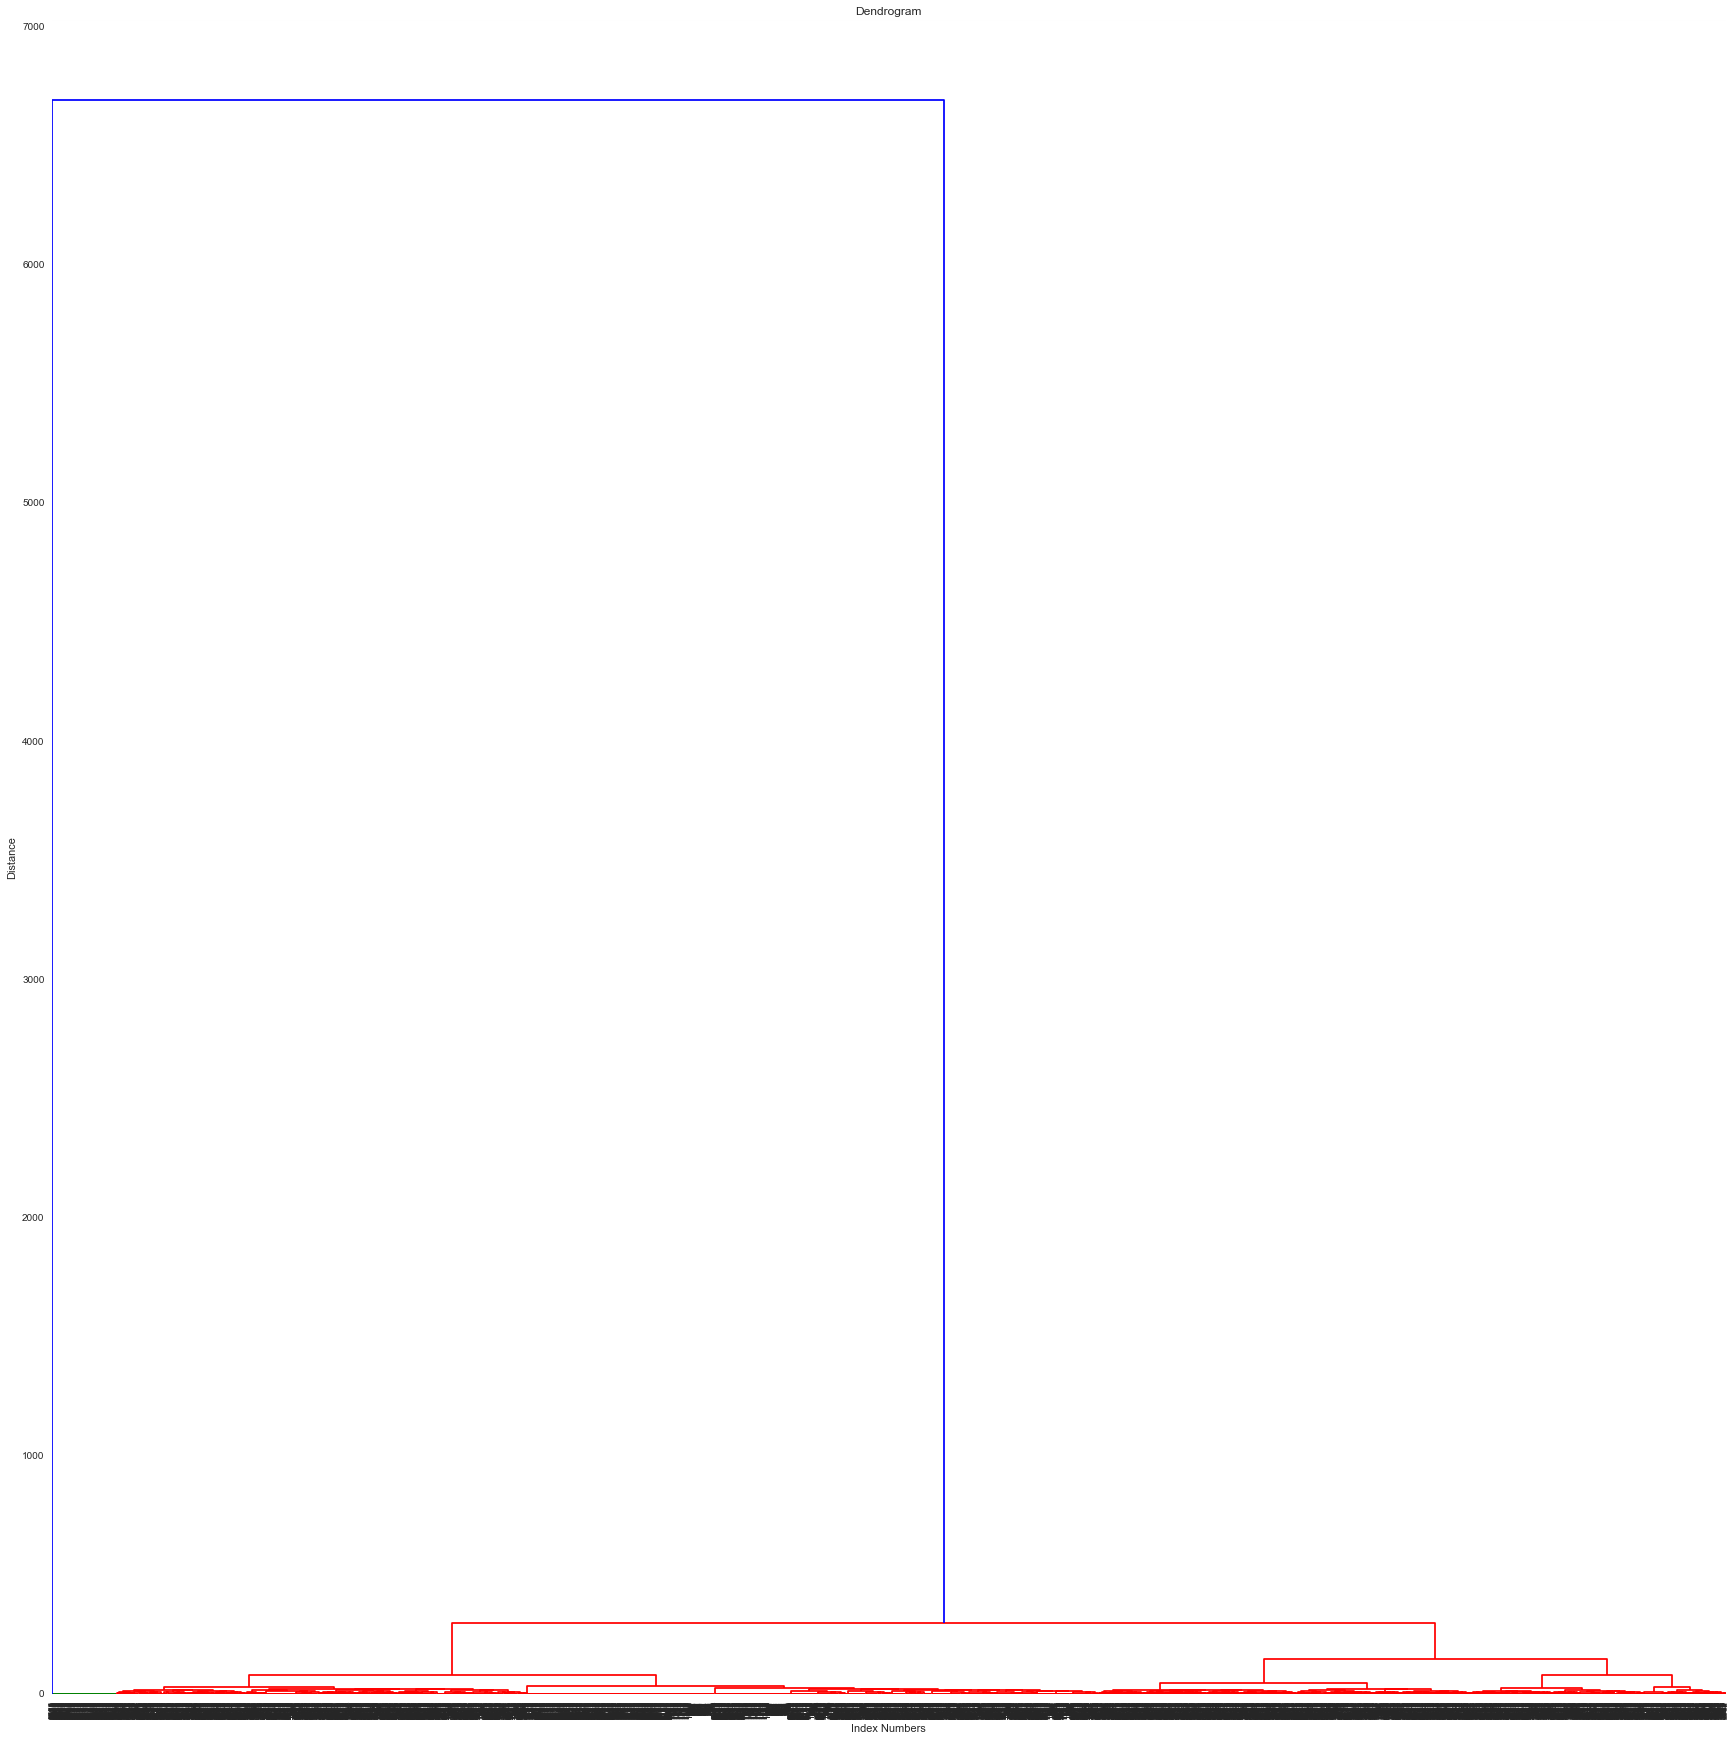

In [122]:
plt.figure(figsize=(30, 10))
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=8.,
)
plt.show()

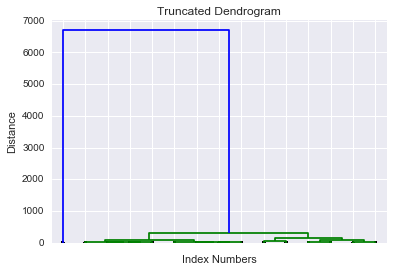

In [123]:
plt.title('Truncated Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp',  
    p=15,  
    show_leaf_counts=False,  
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  
)
plt.show()

In [124]:
max_d = 15
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 6, 10,  6, ..., 15, 24,  7], dtype=int32)

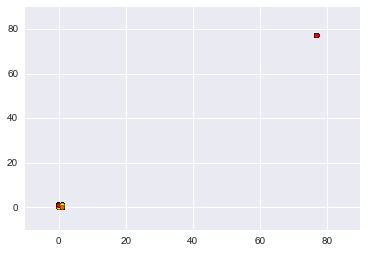

In [125]:
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')
plt.show()

# Supervised ML

In [ ]:
# Set up new dataset where only target variable = HighEdCert

